In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset , DataLoader
import torch.optim as optim

torch.manual_seed(42)

In [3]:
df=pd.read_csv('fmnist_small.csv')

x= df.iloc[:,1:].values
y= df.iloc[:,0].values

In [4]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train=x_train/255.0
x_test= x_test/255.0

In [5]:
class CustomDataset(Dataset):
  def __init__(self,x,y):
    self.features =torch.tensor(x,dtype=torch.float32)
    self.target = torch.tensor(y,dtype =torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx] , self.target[idx]

# dataset object

train_data = CustomDataset(x_train,y_train)
test_data = CustomDataset(x_test,y_test)

# dataloader object

train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)

In [6]:
class MYNN(nn.Module):
  def __init__(self,input_size):
    super().__init__()
    self.model =nn.Sequential(
          nn.Linear(784,128),
          nn.ReLU(),
          nn.Linear(128,64),
          nn.ReLU(),
          nn.Linear(64,10)
      )

  def forward(self,x):
    return self.model(x)


In [7]:
epochs = 100
lr = 0.1
model = MYNN(x_train.shape[1])

loss = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=lr)

In [8]:
train_losses=[]
for epoch in range(epochs):
  total_loss=0

  for x,y in train_loader:

    optimizer.zero_grad()
    # training
    y_hat = model(x)
    # loss
    los_s =loss(y_hat,y)
    # backprop
    los_s.backward()
    # updation
    optimizer.step()
    total_loss+=los_s.item()
  avg_loss=total_loss/len(train_loader)
  train_losses.append(avg_loss)
  print(f'epoch: {epoch+1} , train loss:{avg_loss}')




epoch: 1 , train loss:1.3216368440786999
epoch: 2 , train loss:0.7793365436792373
epoch: 3 , train loss:0.6427524652083715
epoch: 4 , train loss:0.5751657336950302
epoch: 5 , train loss:0.528180201848348
epoch: 6 , train loss:0.49528750121593473
epoch: 7 , train loss:0.4602432996034622
epoch: 8 , train loss:0.4359459094206492
epoch: 9 , train loss:0.41829214423894884
epoch: 10 , train loss:0.3984092291692893
epoch: 11 , train loss:0.3850264506538709
epoch: 12 , train loss:0.3722685620188713
epoch: 13 , train loss:0.3477362078428268
epoch: 14 , train loss:0.3467242218057315
epoch: 15 , train loss:0.3138812760512034
epoch: 16 , train loss:0.3126461291313171
epoch: 17 , train loss:0.29552092105150224
epoch: 18 , train loss:0.2857150869568189
epoch: 19 , train loss:0.27084775785605114
epoch: 20 , train loss:0.26237100958824155
epoch: 21 , train loss:0.25756089876095456
epoch: 22 , train loss:0.24232648963729542
epoch: 23 , train loss:0.23957946779827277
epoch: 24 , train loss:0.22613244935

In [9]:
# evaualtion
model.eval()

MYNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [26]:
total = 0
correct = 0
test_l=0
test_losses=[]
with torch.no_grad():
  for x,y in test_loader:
    y_hat=model(x)
    # loss_value = loss(y_hat, y)   # compute loss properly
    # test_l += loss_value.item()
    _,y_hat = torch.max(y_hat,dim=1)
    total+=y.size(0)
    correct+=(y_hat==y).sum().item()
# test_losses.append(test_l/len(test_loader))

print(f'accuracy : {correct/total}')



accuracy : 0.8325


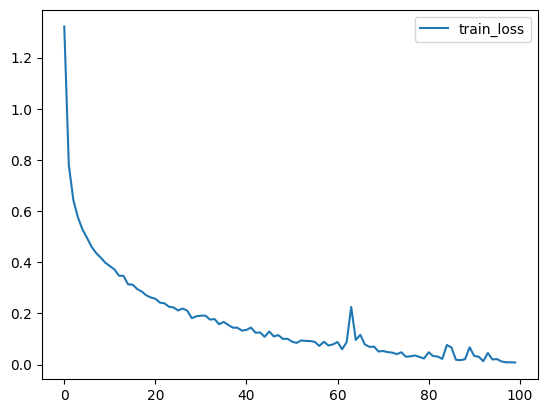

In [27]:
plt.plot(train_losses,label='train_loss')
# plt.plot(test_losses,label='test_loss')
plt.legend()